*****************************************************************
#  Data Mining Techniques
- Group Members: Behnam Bozorgi, Ramon Cremers, Sunny Soni
*****************************************************************

In [1]:
import platform
import sys

print("This jupyter notebook is running on Python " + platform.python_version())
# It's good practice to assert packages requirements at the beginning of a script:
assert sys.version_info >= (3, 6)  # Tested with Python==3.7.5

This jupyter notebook is running on Python 3.9.9


Let's install now the required packages for this project:

In [2]:
!pip install matplotlib
!pip install pandas

You should consider upgrading via the 'U:\Courses\Data Mining Techniques\DMT_Asg_2_interpreter\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'U:\Courses\Data Mining Techniques\DMT_Asg_2_interpreter\Scripts\python.exe -m pip install --upgrade pip' command.


Reading the data sample of expedia:

In [3]:
import pandas as pd

training_set_file_path = 'data/training_set_VU_DM.csv'

training_data = pd.read_csv(training_set_file_path)

########## pre-processing #########

In [4]:
# separating the year and month for more information extraction
training_data["date_time"] = pd.to_datetime(training_data["date_time"])
training_data["year"] = training_data["date_time"].dt.year
training_data["month"] = training_data["date_time"].dt.month
dataFrame = training_data.drop('date_time', 1)

unique_users = dataFrame.srch_id.unique()
print('number of users= ', len(unique_users))

sum_of_nulls = dataFrame.isnull().sum()
number_of_records = len(dataFrame)
percentages_of_nulls = (sum_of_nulls / number_of_records) * 100

sum_of_nulls = dataFrame.isnull().sum()
number_of_records = len(dataFrame)
percentages_of_nulls = (sum_of_nulls / number_of_records) * 100
print("before deleting >90% null columns")
print(percentages_of_nulls)

# more than 90% null columns considered as useless
useless_columns = []
for index, value in percentages_of_nulls.items():
    if value > 90:
        useless_columns.append(index)

dataFrame = dataFrame.drop(useless_columns, 1)



sum_of_nulls = dataFrame.isnull().sum()
number_of_records = len(dataFrame)
percentages_of_nulls = (sum_of_nulls / number_of_records) * 100

print(percentages_of_nulls)

C:\Users\behna\AppData\Local\Temp\ipykernel_16564\2608218180.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataFrame = training_data.drop('date_time', 1)


number of users=  199795
before deleting >90% null columns
srch_id                         0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
visitor_hist_starrating        94.920364
visitor_hist_adr_usd           94.897735
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.00000

C:\Users\behna\AppData\Local\Temp\ipykernel_16564\2608218180.py:26: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataFrame = dataFrame.drop(useless_columns, 1)


srch_id                         0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
orig_destination_distance      32.425766
random_bool                     0.000000
comp2_rate                     59.166392
comp2_inv       

we found out that in comp3 related columns, we removed comp3_rate_percent_diff because it was more than 90% null. So for the integrity of the data, we also remove the comp3_rate and comp3_inv.

In [5]:
dataFrame = dataFrame.drop(['comp3_rate','comp3_inv'], 1)

sum_of_nulls = dataFrame.isnull().sum()
number_of_records = len(dataFrame)
percentages_of_nulls = (sum_of_nulls / number_of_records) * 100

print(percentages_of_nulls)

C:\Users\behna\AppData\Local\Temp\ipykernel_16564\1122922313.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataFrame = dataFrame.drop(['comp3_rate','comp3_inv'], 1)


srch_id                         0.000000
site_id                         0.000000
visitor_location_country_id     0.000000
prop_country_id                 0.000000
prop_id                         0.000000
prop_starrating                 0.000000
prop_review_score               0.148517
prop_brand_bool                 0.000000
prop_location_score1            0.000000
prop_location_score2           21.990151
prop_log_historical_price       0.000000
position                        0.000000
price_usd                       0.000000
promotion_flag                  0.000000
srch_destination_id             0.000000
srch_length_of_stay             0.000000
srch_booking_window             0.000000
srch_adults_count               0.000000
srch_children_count             0.000000
srch_room_count                 0.000000
srch_saturday_night_bool        0.000000
orig_destination_distance      32.425766
random_bool                     0.000000
comp2_rate                     59.166392
comp2_inv       

In [6]:
dataFrame.head()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,booking_bool,year,month
0,1,12,187,219,893,3,3.5,1,2.83,0.0438,...,0.0,0.0,NaN,0.0,0.0,NaN,0,0,2013,4
1,1,12,187,219,10404,4,4.0,1,2.20,0.0149,...,0.0,1.0,NaN,0.0,0.0,NaN,0,0,2013,4
2,1,12,187,219,21315,3,4.5,1,2.20,0.0245,...,0.0,0.0,NaN,0.0,0.0,NaN,0,0,2013,4
3,1,12,187,219,27348,2,4.0,1,2.83,0.0125,...,0.0,1.0,NaN,-1.0,0.0,5.0,0,0,2013,4
4,1,12,187,219,29604,4,3.5,1,2.64,0.1241,...,0.0,0.0,NaN,0.0,0.0,NaN,0,0,2013,4


In [7]:
dataFrame.describe()

,srch_id,site_id,visitor_location_country_id,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,...,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,booking_bool,year,month
count,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06,4.950983e+06,4.958347e+06,4.958347e+06,3.867999e+06,...,2.222373e+06,2.360020e+06,841099.000000,1.916654e+06,1.987503e+06,614730.000000,4.958347e+06,4.958347e+06,4.958347e+06,4.958347e+06
mean,1.663666e+05,9.953133e+00,1.753405e+02,1.739739e+02,7.007918e+04,3.180525e+00,3.777777e+00,6.346994e-01,2.872589e+00,1.303852e-01,...,2.267621e-02,5.142880e-02,29.851903,-6.089936e-02,9.962752e-03,22.430384,4.474858e-02,2.791051e-02,2.012803e+03,5.164621e+00
std,9.611223e+04,7.646890e+00,6.591625e+01,6.834525e+01,4.060992e+04,1.051024e+00,1.050329e+00,4.815144e-01,1.531011e+00,1.594634e-01,...,5.217575e-01,2.678363e-01,1340.262382,4.691723e-01,2.029142e-01,895.965854,2.067514e-01,1.647165e-01,3.976035e-01,3.492702e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-1.000000e+00,-1.000000e+00,2.000000,-1.000000e+00,-1.000000e+00,2.000000,0.000000e+00,0.000000e+00,2.012000e+03,1.000000e+00
25%,8.293600e+04,5.000000e+00,1.000000e+02,1.000000e+02,3.501000e+04,3.000000e+00,3.500000e+00,0.000000e+00,1.790000e+00,1.900000e-02,...,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.000000e+00,7.000000,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00
50%,1.665070e+05,5.000000e+00,2.190000e+02,2.190000e+02,6.963800e+04,3.000000e+00,4.000000e+00,1.000000e+00,2.770000e+00,6.900000e-02,...,0.000000e+00,0.000000e+00,12.000000,0.000000e+00,0.000000e+00,11.000000,0.000000e+00,0.000000e+00,2.013000e+03,4.000000e+00
75%,2.497240e+05,1.400000e+01,2.190000e+02,2.190000e+02,1.051680e+05,4.000000e+00,4.500000e+00,1.000000e+00,4.040000e+00,1.805000e-01,...,0.000000e+00,0.000000e+00,21.000000,0.000000e+00,0.000000e+00,17.000000,0.000000e+00,0.000000e+00,2.013000e+03,6.000000e+00
max,3.327850e+05,3.400000e+01,2.310000e+02,2.300000e+02,1.408210e+05,5.000000e+00,5.000000e+00,1.000000e+00,6.980000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,607561.000000,1.000000e+00,1.000000e+00,149400.000000,1.000000e+00,1.000000e+00,2.013000e+03,1.200000e+01


In [8]:
import os

processed_data_path = os.path.join(os.getcwd(),'data/train_data.csv')

dataFrame.to_csv(path_or_buf=processed_data_path)

########## EDA Start #########

First we investigate which country is the most busy country. Which means which country had most bookings in their hotels

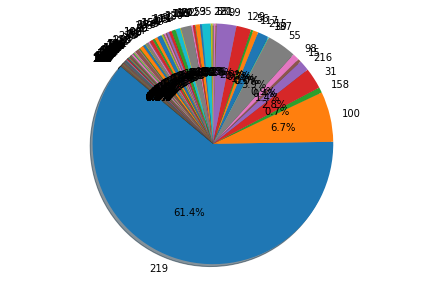

In [9]:
import calendar
import matplotlib.pyplot as plt

countries = []
countries_count = []
all_countries_exists_in_data = dataFrame.prop_country_id.unique()
for country in all_countries_exists_in_data:
    countries_with_booked_hotels = dataFrame.loc[(dataFrame.prop_country_id == country) & (dataFrame.booking_bool == 1)]
    countries.append(country)
    countries_count.append(len(countries_with_booked_hotels))

labels = countries
sizes = countries_count
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Now we look at which Year has the most bookings

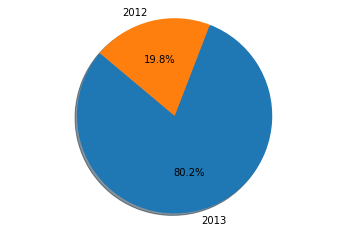

In [10]:
years = []
years_count = []
unique_years = dataFrame.year.unique()
for year in unique_years:  # there's only these 2 years in the data
    years_with_booked_hotels = dataFrame.loc[(dataFrame['year'] == year) & (dataFrame.booking_bool == 1)]
    years.append(str(year))
    years_count.append(len(years_with_booked_hotels))

labels = years
sizes = years_count
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Now we look at which Months of years has the most bookings

[ 4 12  6  3  2 11  5  1]


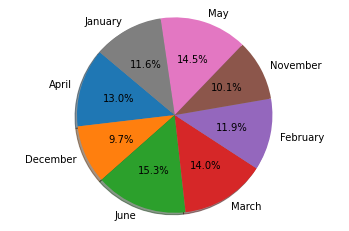

In [11]:
months = []
months_count = []
unique_months = dataFrame.month.unique();
print(unique_months)
for month in unique_months:  # there's only these 2 years in the data
    months_with_booked_hotels = dataFrame.loc[(dataFrame['month'] == month) & (dataFrame.booking_bool == 1)]
    months.append(calendar.month_name[month])
    months_count.append(len(months_with_booked_hotels))

labels = months
sizes = months_count
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

Now we look which positions in search were mostly got into booking

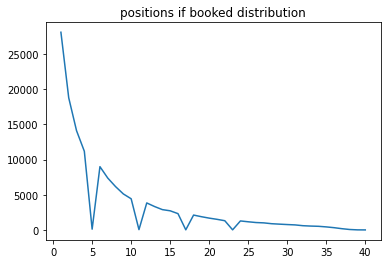

In [12]:
positions = []
positions_count = []
unique_positions = dataFrame.position.unique()
unique_positions.sort()
for position in unique_positions:  # there's only these 2 years in the data
    positions_with_booked_hotels = dataFrame.loc[(dataFrame['position'] == position) & (dataFrame.booking_bool == 1)]
    positions.append(position)
    positions_count.append(len(positions_with_booked_hotels))

plt.title('positions if booked distribution')
plt.plot(positions, positions_count)
plt.show()

Now we look at relation of ratings of hotel with booking

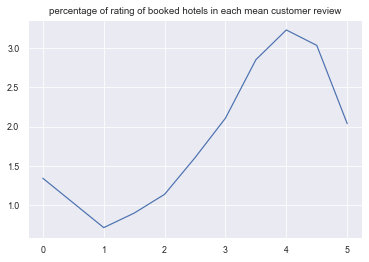

In [34]:
ratings = []
ratings_count = []
ratings_count_percent = []
unique_ratings = dataFrame.prop_review_score.unique()
unique_ratings.sort()
for rating in unique_ratings:  # there's only these 2 years in the data
    unique_ratings_with_booked_hotels = dataFrame.loc[(dataFrame['prop_review_score'] == rating) & (dataFrame.booking_bool == 1)]
    unique_ratings = dataFrame.loc[(dataFrame['prop_review_score'] == rating)]
    if len(unique_ratings_with_booked_hotels) == 0 or len(unique_ratings) == 0:
        percentage = 0
    else:
        percentage = (len(unique_ratings_with_booked_hotels)/len(unique_ratings))*100

    ratings_count_percent.append(percentage)
    ratings.append(rating)

plt.title('percentage of rating of booked hotels in each mean customer review')
plt.plot(ratings, ratings_count_percent)
plt.show()

To find out about the correlation of certain variables, we use seaborn to generate a heatmap

In [14]:
import seaborn as sns
import numpy as np

correlation = training_data.corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


C:\Users\behna\AppData\Local\Temp\ipykernel_16564\4091632042.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlation, dtype=np.bool)


In [15]:
corr = correlation.unstack()
corr = corr.sort_values(kind="quicksort", ascending=False)
corr.to_csv('Analysis/correlation.csv')

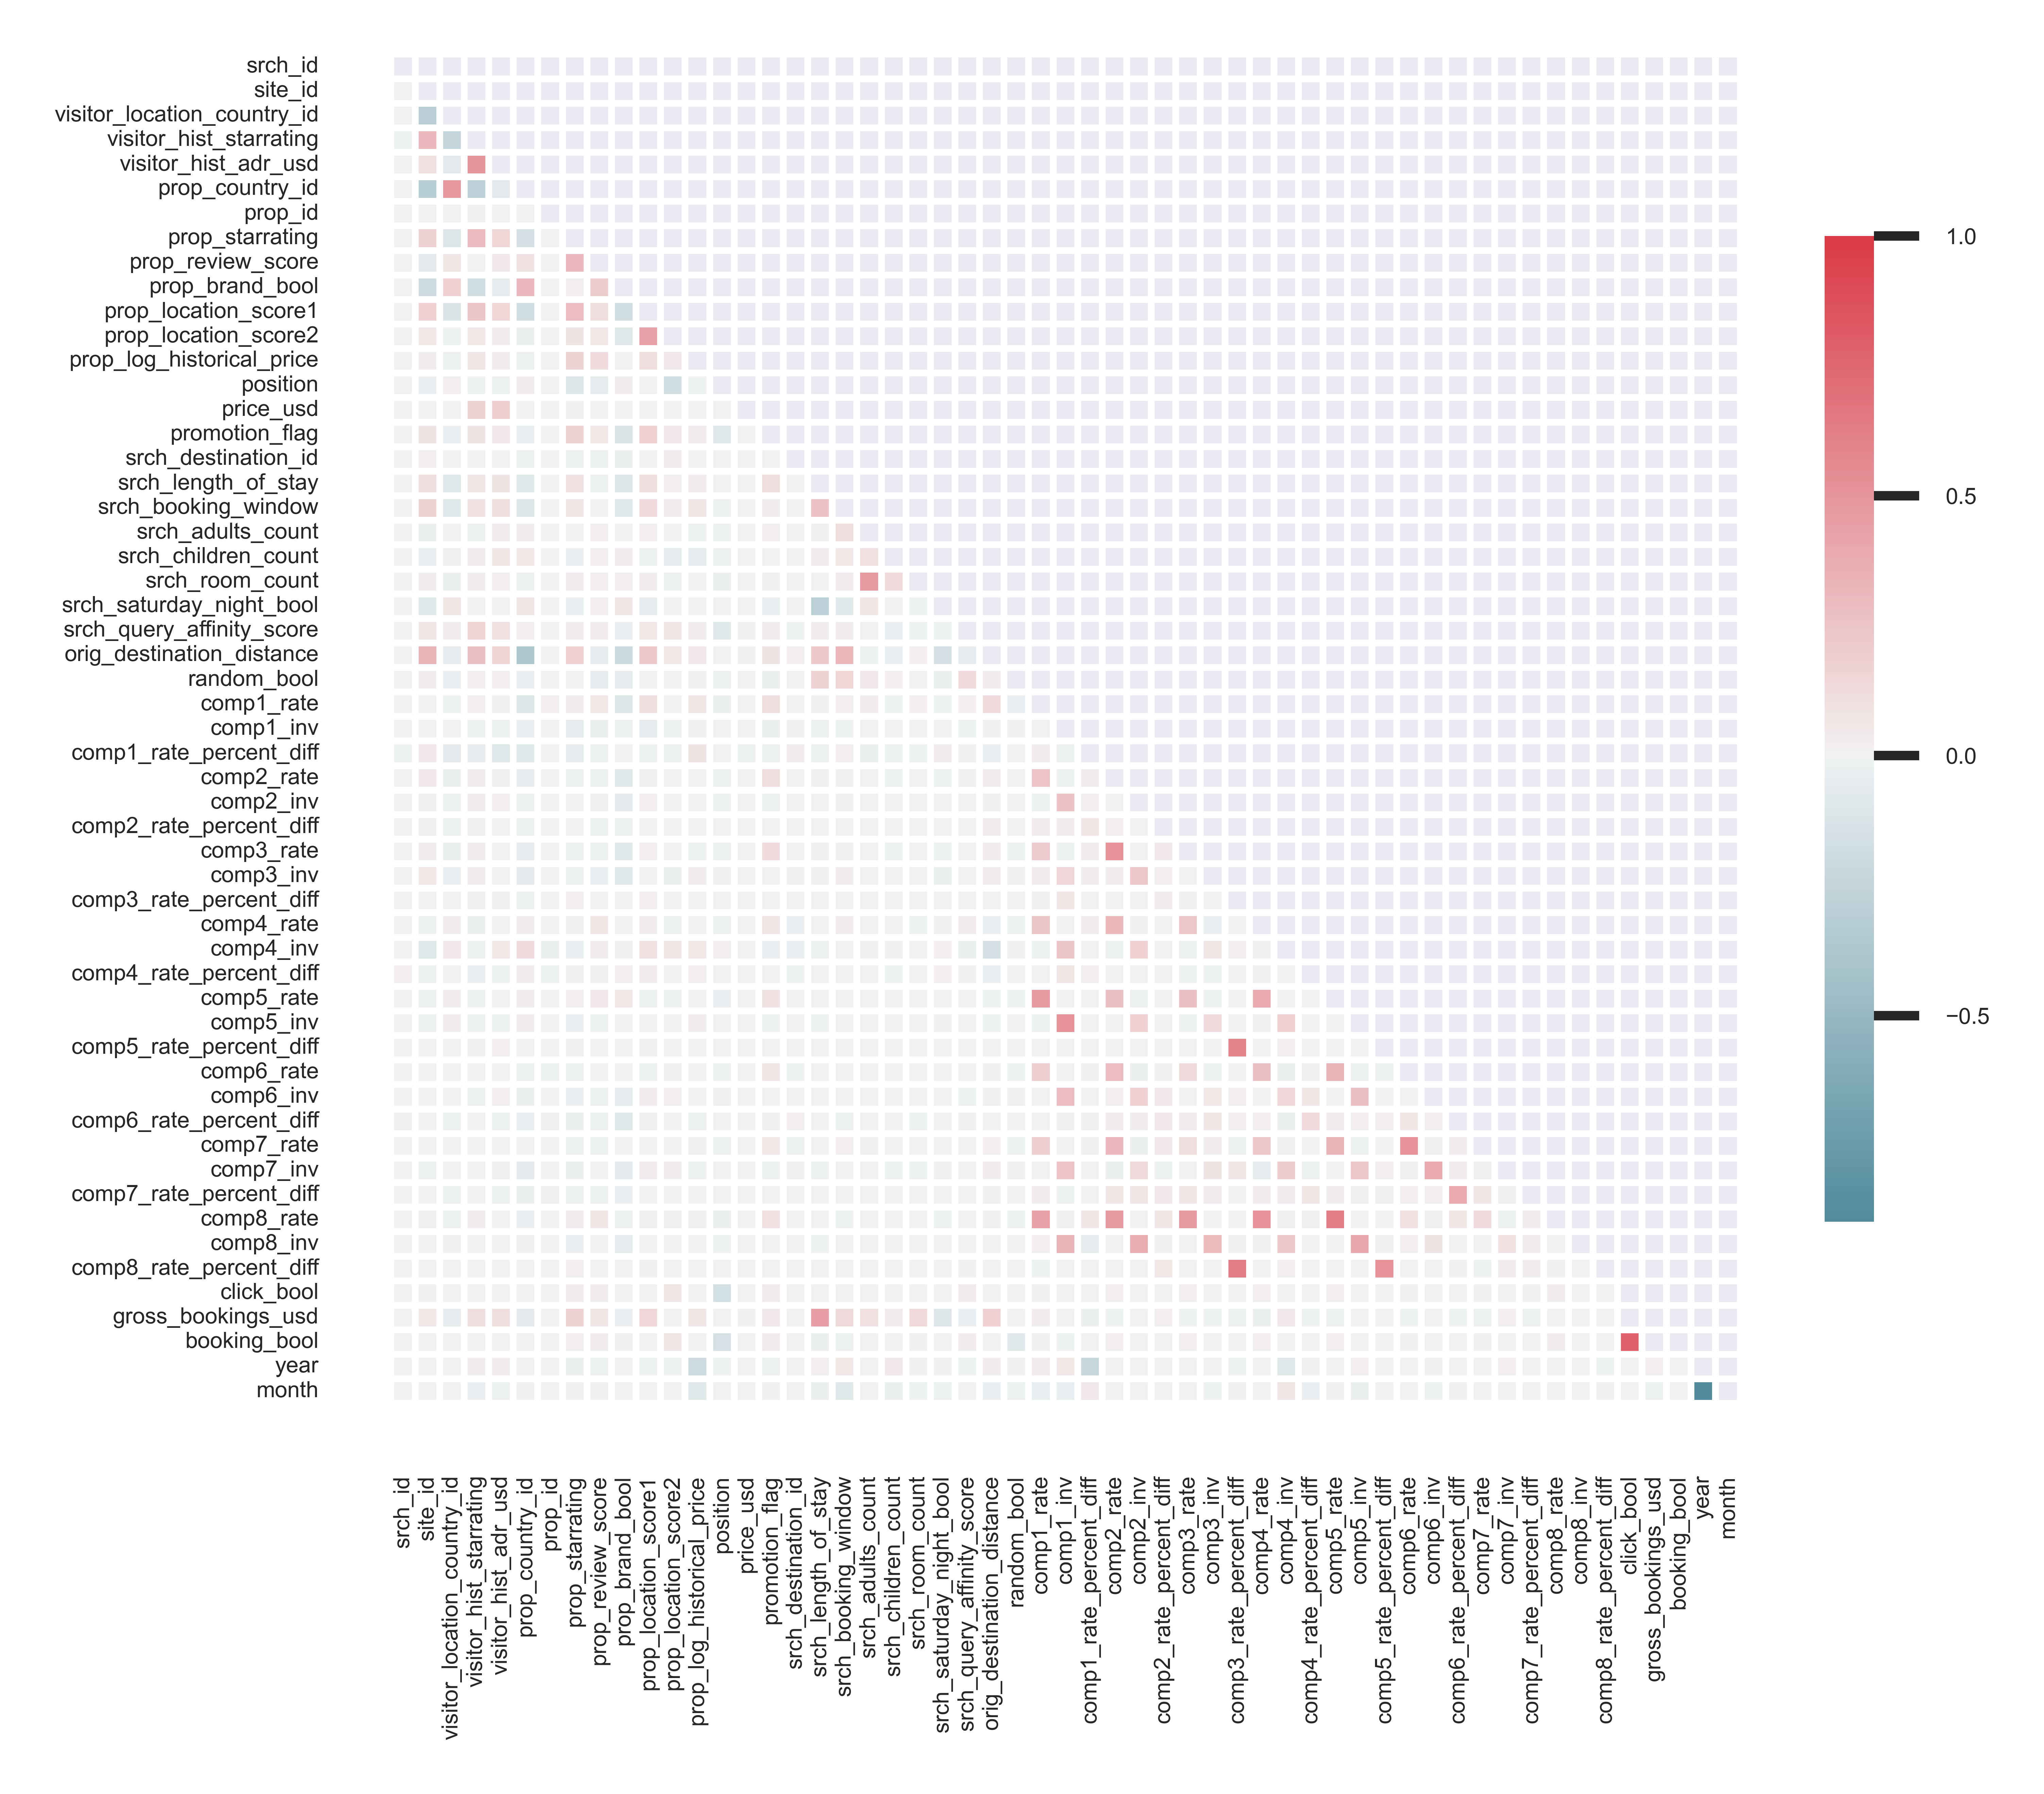

In [16]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(4, 4), dpi=1600)
sns.set(font_scale=0.27)
sns_plot = sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, center=0,
                       square=True, linewidths=.9, cbar_kws={"shrink": 0.6})
sns.set_context("paper")
sns_plot.figure.savefig("Analysis/correlation_plot", dpi=2000)

In [ ]:
print('********* EDA Finished! *********');